# Яндекс.Музыка

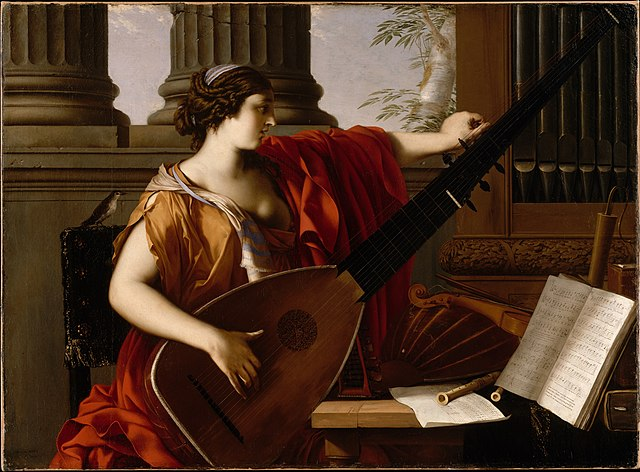

## Задачи исследования
Доступен файл с данными о пользователях сервиса Яндекс.Музыка из Москвы и Санкт-Петербурга. Необходимо провести базовое сравнение муызкальных предпочтений пользователей из двух столиц.

**Цель исследования** — проверить три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

## Обзор данных

Загрузим необходимую библиотеку и файл с данными о пользователях.

In [3]:
# импорт библиотеки pandas
import pandas as pd

In [15]:
! gdown 1_JyCeoY4rJqTdqIQGrvSYBc3qrQV5MN7

Downloading...
From: https://drive.google.com/uc?id=1_JyCeoY4rJqTdqIQGrvSYBc3qrQV5MN7
To: /content/yandex_music_project.csv
100% 4.77M/4.77M [00:00<00:00, 28.7MB/s]


In [17]:
# чтение файла с данными и сохранение в df
try:
    df = pd.read_csv('/content/yandex_music_project.csv')
except:
    print('Возникла проблема с файлом данных')

Выведем на экран первые десять строк таблицы:

In [18]:
# получение первых 10 строк таблицы df
display(df.head(10))

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


Посмотрим на общую информацию о таблице:

In [19]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

В названиях колонок видны три нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.
3. В названиях колонок не используется _snake case_, в названии переменной `userID` лучше поставить знак нижнего подчёркивания, чтобы разделить слова и записать _ID_ в нижнем регистре 

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше нужно устранить проблемы в данных.

## Предобработка данных
Исправим стиль в заголовках столбцов, исключим пропуски. Затем проверим данные на дубликаты.

### Стиль заголовков
Ещё раз посмотрим на названия столбцов:

In [20]:
# перечень названий столбцов таблицы df
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

Приведём названия в соответствие с хорошим стилем:
* несколько слов в названии запишем в «змеином_регистре»,
* все символы сделаем строчными,
* устраним пробелы.

Для этого переименуем колонки так:
* `'  userID'` → `'user_id'`;
* `'Track'` → `'track'`;
* `'  City  '` → `'city'`;
* `'Day'` → `'day'`.

In [21]:
# переименование столбцов
df.rename(columns={'  userID': 'user_id', 'Track': 'track', '  City  ': 'city', 'Day': 'day'}, inplace=True)

Проверим результат:

In [22]:
# проверка результатов - перечень названий столбцов
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

### Пропуски значений
Сначала посчитаем, сколько в таблице пропущенных значений.

In [23]:
# подсчёт пропусков
df.isna().sum()

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64

Не все пропущенные значения влияют на исследование. Так в `track` и `artist` пропуски не важны для нашей работы. Достаточно заменить их явными обозначениями.

Но пропуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Придётся:
* заполнить и эти пропуски явными обозначениями,
* оценить, насколько они повредят расчётам. 

Заменим пропущенные значения в столбцах `track`, `artist` и `genre` на строку `'unknown'`. Для этого создадим список `columns_to_replace`, переберём его элементы циклом `for` и для каждого столбца выполним замену пропущенных значений:

In [24]:
# перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
columns_to_replace = ['track', 'artist', 'genre']
df[columns_to_replace] = df[columns_to_replace].fillna('unknown')

Убедимся, что в таблице не осталось пропусков. Для этого ещё раз посчитаем пропущенные значения.

In [25]:
# подсчёт пропусков
df.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

### Дубликаты
Посчитаем явные дубликаты в таблице:

In [26]:
# подсчёт явных дубликатов
df.duplicated().sum()

3826

Видно, что в таблице 3826 записей являются явными дубликатами. Их можно удалить:

In [27]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
df = df.drop_duplicates()
df = df.reset_index(drop=True)

Проверим, что дубликатов больше нет:

In [28]:
# проверка на отсутствие дубликатов
df.duplicated().sum()

0

Теперь избавимся от неявных дубликатов в колонке `genre`. Например, название одного и того же жанра может быть записано немного по-разному. Такие ошибки тоже повлияют на результат исследования.

Выведем на экран список уникальных названий жанров, отсортированный в алфавитном порядке.

In [29]:
# Просмотр уникальных названий жанров
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

В списке жанров видно несколько неявных дубликатов. Например, помимо жанра `hiphop` присутствуют неявные дубликаты `hip`, `hop`, `hip-hop`.

Чтобы очистить от них таблицу, напишем функцию `replace_wrong_genres()` с двумя параметрами: 
* `wrong_genres` — список дубликатов,
* `correct_genre` — строка с правильным значением.

In [30]:
# Функция для замены неявных дубликатов
def replace_wrong_genres(wrong_genres, correct_genre):
    for wrong_genre in wrong_genres:
        df['genre'][df['genre'] == wrong_genre] = correct_genre

Вызовем `replace_wrong_genres()` и передадим ей такие аргументы, чтобы она устранила неявные дубликаты: вместо `hip`, `hop` и `hip-hop` в таблице должно быть значение `hiphop`:

In [31]:
# Устранение неявных дубликатов
replace_wrong_genres(['hip', 'hop', 'hip-hop'], 'hiphop')

Проверим, что заменили неправильные названия:
*   `hip`
*   `hop`
*   `hip-hop`

Выведем отсортированный список уникальных значений столбца `genre`:

In [32]:
# Проверка на неявные дубликаты
genres = df.loc[:,'genre'].sort_values()
genres.unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Мы исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения мы заменили на `'unknown'`.

Теперь можно перейти к проверке гипотез. 

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверим это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделим пользователей Москвы и Санкт-Петербурга
* Сравним, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.

Для тренировки сначала выполним каждый из расчётов по отдельности. 

Оценим активность пользователей в каждом городе. Сгруппируем данные по городу и посчитаем прослушивания в каждой группе.

In [33]:
# Подсчёт прослушиваний в каждом городе
df.groupby('city')['user_id'].count()

city
Moscow              42741
Saint-Petersburg    18512
Name: user_id, dtype: int64

В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

Теперь сгруппируем данные по дню недели и подсчитаем прослушивания в понедельник, среду и пятницу.

In [34]:
# Подсчёт прослушиваний в каждый из трёх дней
df.groupby('day')['user_id'].count()

day
Friday       21840
Monday       21354
Wednesday    18059
Name: user_id, dtype: int64

В среднем пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.

Мы проверили, как работает группировка по городу и по дням недели. Теперь напишием функцию, которая объединит два эти расчёта.

Создадим функцию `number_tracks()`, которая посчитает прослушивания для заданного дня и города. Ей понадобятся два параметра:
* день недели,
* название города.

В функции сохраним в переменную строки исходной таблицы, у которых значение:
  * в колонке `day` равно параметру `day`,
  * в колонке `city` равно параметру `city`.

Для этого применим последовательную фильтрацию с логической индексацией.

Затем посчитаем значения в столбце `user_id` получившейся таблицы. Результат сохраним в новую переменную. Вернём эту переменную из функции.

In [35]:
# <создание функции number_tracks()>
# Объявляется функция с двумя параметрами: day, city.
# В переменной track_list сохраняются те строки таблицы df, для которых 
# значение в столбце 'day' равно параметру day и одновременно значение
# в столбце 'city' равно параметру city (используйте последовательную фильтрацию
# с помощью логической индексации).
# В переменной track_list_count сохраняется число значений столбца 'user_id',
# рассчитанное методом count() для таблицы track_list.
# Функция возвращает число - значение track_list_count.

# Функция для подсчёта прослушиваний для конкретного города и дня.
# С помощью последовательной фильтрации с логической индексацией она 
# сначала получит из исходной таблицы строки с нужным днём,
# затем из результата отфильтрует строки с нужным городом,
# методом count() посчитает количество значений в колонке user_id. 
# Это количество функция вернёт в качестве результата
def number_tracks(day_of_the_week, city):
    track_list = df[df['day'] == day_of_the_week]
    track_list = track_list[track_list['city'] == city]
    track_list_count = track_list['user_id'].count()
    return track_list_count

Вызовем `number_tracks()` шесть раз, меняя значение параметров — так, чтобы получить данные для каждого города в каждый из трёх дней.

In [36]:
# количество прослушиваний в Москве по понедельникам
number_tracks('Monday', 'Moscow')

15740

In [37]:
# количество прослушиваний в Санкт-Петербурге по понедельникам
number_tracks('Monday', 'Saint-Petersburg')

5614

In [38]:
# количество прослушиваний в Москве по средам
number_tracks('Wednesday', 'Moscow')

11056

In [39]:
# количество прослушиваний в Санкт-Петербурге по средам
number_tracks('Wednesday', 'Saint-Petersburg')

7003

In [40]:
# количество прослушиваний в Москве по пятницам
number_tracks('Friday', 'Moscow')

15945

In [41]:
# количество прослушиваний в Санкт-Петербурге по пятницам
number_tracks('Friday', 'Saint-Petersburg')

5895

Создадим c помощью конструктора `pd.DataFrame` таблицу, где
* названия колонок — `['city', 'monday', 'wednesday', 'friday']`;
* данные — результаты, которые мы получили с помощью `number_tracks`.

In [42]:
# Таблица с результатами
data = [['Moscow', 15740, 11056, 15945],
        ['Saint-Petersburg', 5614, 7003, 5895]]
columns = ['city', 'monday', 'wednesday', 'friday']
results = pd.DataFrame(data=data, columns=columns)
display(results) # проверяем, что всё хорошо

,city,monday,wednesday,friday
0,Moscow,15740,11056,15945
1,Saint-Petersburg,5614,7003,5895


**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

Сохраним таблицы с данными в две переменные:
* по Москве — в `moscow_general`;
* по Санкт-Петербургу — в `spb_general`.

In [ ]:
# получение таблицы moscow_general из тех строк таблицы df, 
# для которых значение в столбце 'city' равно 'Moscow'
moscow_general = df[df['city'] == 'Moscow']

In [ ]:
# получение таблицы spb_general из тех строк таблицы df,
# для которых значение в столбце 'city' равно 'Saint-Petersburg'
spb_general = df[df['city'] == 'Saint-Petersburg']

Создадим функцию `genre_weekday()` с четырьмя параметрами:
* таблица (датафрейм) с данными,
* день недели,
* начальная временная метка в формате 'hh:mm', 
* последняя временная метка в формате 'hh:mm'.

Функция должна вернуть информацию о топ-10 жанров тех треков, которые прослушивали в указанный день, в промежутке между двумя отметками времени.

In [ ]:
# Объявление функции genre_weekday() с параметрами table, day, time1, time2,
# которая возвращает информацию о самых популярных жанрах в указанный день в
# заданное время:
# 1) в переменную genre_df сохраняются те строки переданного датафрейма table, для
#    которых одновременно:
#    - значение в столбце day равно значению аргумента day
#    - значение в столбце time больше значения аргумента time1
#    - значение в столбце time меньше значения аргумента time2
#    Используйте последовательную фильтрацию с помощью логической индексации.
# 2) сгруппировать датафрейм genre_df по столбцу genre, взять один из его
#    столбцов и посчитать методом count() количество записей для каждого из
#    присутствующих жанров, получившийся Series записать в переменную
#    genre_df_count
# 3) отсортировать genre_df_count по убыванию встречаемости и сохранить
#    в переменную genre_df_sorted
# 4) вернуть Series из 10 первых значений genre_df_sorted, это будут топ-10
#    популярных жанров (в указанный день, в заданное время)
def genre_weekday(table, day, time1, time2):
    genre_df = table[table['day'] == day]
    genre_df = genre_df[genre_df['time'] > time1]
    genre_df = genre_df[genre_df['time'] < time2]
    genre_df_count = genre_df.groupby('genre')['user_id'].count()
    genre_df_sorted = genre_df_count.sort_values(ascending=False)
    return genre_df_sorted.head(10)

Cравним результаты функции `genre_weekday()` для Москвы и Санкт-Петербурга в понедельник утром (с 7:00 до 11:00) и в пятницу вечером (с 17:00 до 23:00):

In [ ]:
# вызов функции для утра понедельника в Москве (вместо df — таблица moscow_general)
# объекты, хранящие время, являются строками и сравниваются как строки
# пример вызова: genre_weekday(moscow_general, 'Monday', '07:00', '11:00')
genre_weekday(moscow_general, 'Monday', '07:00', '11:00')

genre
pop            781
dance          549
electronic     480
rock           474
hiphop         286
ruspop         186
world          181
rusrap         175
alternative    164
unknown        161
Name: user_id, dtype: int64

In [ ]:
# вызов функции для утра понедельника в Петербурге (вместо df — таблица spb_general)
genre_weekday(spb_general, 'Monday', '07:00', '11:00')

genre
pop            218
dance          182
rock           162
electronic     147
hiphop          80
ruspop          64
alternative     58
rusrap          55
jazz            44
classical       40
Name: user_id, dtype: int64

In [ ]:
# вызов функции для вечера пятницы в Москве
genre_weekday(moscow_general, 'Friday', '17:00', '23:00')

genre
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
alternative    163
classical      163
rusrap         142
Name: user_id, dtype: int64

In [ ]:
# вызов функции для вечера пятницы в Петербурге
genre_weekday(spb_general, 'Friday', '17:00', '23:00')

genre
pop            256
electronic     216
rock           216
dance          210
hiphop          97
alternative     63
jazz            61
classical       60
rusrap          59
world           54
Name: user_id, dtype: int64

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр _world_, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение _unknown_ заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

Сгруппируем таблицу `moscow_general` по жанру и посчитаем прослушивания треков каждого жанра методом `count()`. Затем отсортируем результат в порядке убывания и сохраним его в таблице `moscow_genres`.

In [ ]:
# группировка таблицы moscow_general по столбцу 'genre', 
# подсчёт числа значений 'genre' в этой группировке методом count(), 
# сортировка получившегося Series в порядке убывания и сохранение в moscow_genres
moscow_genres = moscow_general.groupby('genre')['user_id'].count().sort_values(ascending=False)

Выведем на экран первые десять строк `moscow_genres`:

In [ ]:
# просмотр первых 10 строк moscow_genres
moscow_genres.head(10)

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: user_id, dtype: int64

Теперь повторим то же и для Петербурга.

Сгруппируем таблицу `spb_general` по жанру. Посчитаем прослушивания треков каждого жанра. Результат отсортируем в порядке убывания и сохраним в таблице `spb_genres`:

In [ ]:
# группировка таблицы spb_general по столбцу 'genre', 
# подсчёт числа значений 'genre' в этой группировке методом count(), 
# сортировка получившегося Series в порядке убывания и сохранение в spb_genres
spb_genres = spb_general.groupby('genre')['user_id'].count().sort_values(ascending=False)

Выведем на экран первые десять строк `spb_genres`:

In [ ]:
# просмотр первых 10 строк spb_genres
spb_genres.head(10)

genre
pop            2431
dance          1932
rock           1879
electronic     1736
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: user_id, dtype: int64

**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 


## Итоги исследования

Нам доступен файл с данными о пользователях сервиса Яндекс.Музыка из Москвы и Санкт-Петербурга. Необходимо провести базовое сравнение муызкальных предпочтений пользователей из двух столиц.

**Цель исследования** — проверить три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

Мы проверили все три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра _“world”_,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.